In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The purpose of this analysis is to see if there is any relationship between the education level/degree or profession of US presidents and the terms they spend as president.

All data will be collected from public websites such as Wikipedia and thus I don't own these data.

In [2]:
# Obtain data on Presidents name, number, party, term (Years in which they were Presidents)
data=pd.read_html('http://australianpolitics.com/usa/president/list-of-presidents-of-the-united-states')
data[0]

,0,1,2,3,4,5,6,7
0,Presidents of the United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No.,Name,Term,Vice-President,Party,Congress,House Majority,Senate Majority
2,1,George Washington,1789-1797,John Adams,None,1st 2nd 3rd 4th,NaN,NaN
3,2,John Adams,1797-1801,Thomas Jefferson,Federalist,5th 6th,N/A Fed,N/A Fed
4,3,Thomas Jefferson,1801-1809,Aaron Burr (1801-05) George Clinton (1805-09),Democratic- Republican,7th 8th 9th 10th,Dem-Rep Dem-Rep Dem-Rep Dem-Rep,Dem-Rep Dem-Rep Dem-Rep Dem-Rep
5,4,James Madison,1809-1817,George Clinton (1809-12)(a) Elbridge Gerry (18...,Democratic- Republican,11th 12th 13th 14th,Dem-Rep Dem-Rep Dem-Rep Dem-Rep,Dem-Rep Dem-Rep Dem-Rep Dem-Rep
6,5,James Monroe,1817-1825,Daniel D. Tompkins,Democratic- Republican,15th 16th 17th 18th,Dem-Rep Dem-Rep Dem-Rep Dem-Rep,Dem-Rep Dem-Rep Dem-Rep Dem-Rep
7,6,John Quincy Adams,1825-1829,John C. Calhoun,National- Republican,19th 20th,Nat-Rep Dem,Nat-Rep Dem
8,7,Andrew Jackson,1829-1837,John C. Calhoun (1829-32)(b) Martin Van Buren ...,Democrat,21st 22nd 23rd 24th,Dem Dem Dem Dem,Dem Dem Dem Dem
9,8,Martin Van Buren,1837-1841,Richard M. Johnson,Democrat,25th 26th,Dem Dem,Dem Dem


In [3]:
# Make a df to store the data I want
presidents_df = pd.DataFrame(data={'Number': data[0][0],
                                 'Name': data[0][1],
                                 'Term': data[0][2],
                                 'Party': data[0][4]})

presidents_df.drop([0,1], inplace=True)
presidents_df.to_csv('presidents_info.csv', index=False)

In [4]:
data_presidents = pd.read_csv('presidents_info.csv')
data_presidents.head()

,Number,Name,Term,Party
0,1,George Washington,1789-1797,None
1,2,John Adams,1797-1801,Federalist
2,3,Thomas Jefferson,1801-1809,Democratic- Republican
3,4,James Madison,1809-1817,Democratic- Republican
4,5,James Monroe,1817-1825,Democratic- Republican


In [5]:
# Obtain data on Undergraduate and Graduate institution for each President
schools_html = pd.read_html('https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States_by_education')
schools_df = pd.DataFrame(data={'Name': schools_html[8][0],
                              'Undergrad_institution': schools_html[8][2],
                              'Graduate_institution': schools_html[8][3]}).drop([0], axis=0)

#President #23 is not in the data. Lets add him. One way is to slice the current df and append the new data.
#Then append the rest of the original df.

new_schools = schools_df[:23] #Slice current df

#President #23 data
nan_df = pd.DataFrame(data={'Name':'Grover Cleveland',
                           'Undergrad_institution':np.nan,
                           'Graduate_institution':np.nan}, index=[23])

new_schools = new_schools.append(nan_df)

#add the rest of the original df. index is not acccurate, so lets reset it.
new_schools = new_schools.append(schools_df[23:]).reset_index(drop=True) 

new_schools.to_csv('presidents_by_scools.csv', index=False) #saving our work for further use

In [6]:
schools_df = pd.read_csv('presidents_by_scools.csv')
schools_df.head()

,Name,Undergrad_institution,Graduate_institution
0,George Washington,Did not attend college,none
1,John Adams,Harvard University,none
2,Thomas Jefferson,The College of William and Mary,none
3,James Madison,Princeton University,none
4,James Monroe,The College of William and Mary (did not gradu...,none


In [7]:
# Lets join the 2 df to have all the data in a single df.
presidents_schools = data_presidents.join(schools_df, lsuffix='_of_president').drop(labels='Name', axis=1)

#lets add a new feature for graduate degree. Since only 9 presidents have graduate degrees, I am going to add them by hand.
presidents_schools['Graduate_degree'] = np.nan 
presidents_schools.head()

,Number,Name_of_president,Term,Party,Undergrad_institution,Graduate_institution,Graduate_degree
0,1,George Washington,1789-1797,None,Did not attend college,none,NaN
1,2,John Adams,1797-1801,Federalist,Harvard University,none,NaN
2,3,Thomas Jefferson,1801-1809,Democratic- Republican,The College of William and Mary,none,NaN
3,4,James Madison,1809-1817,Democratic- Republican,Princeton University,none,NaN
4,5,James Monroe,1817-1825,Democratic- Republican,The College of William and Mary (did not gradu...,none,NaN


In [8]:
#Data obtained from: https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States_by_education

presidents_schools['Graduate_degree'].iloc[42] = 'MBA'

presidents_schools['Graduate_degree'].iloc[36] = 'JD'
presidents_schools['Graduate_degree'].iloc[37] = 'JD'
presidents_schools['Graduate_degree'].iloc[41] = 'JD'
presidents_schools['Graduate_degree'].iloc[43] = 'JD'

presidents_schools['Graduate_degree'].iloc[27] = 'Ph.D.'

presidents_schools

C:\Users\Jason Sosa\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Number,Name_of_president,Term,Party,Undergrad_institution,Graduate_institution,Graduate_degree
0,1,George Washington,1789-1797,None,Did not attend college,none,NaN
1,2,John Adams,1797-1801,Federalist,Harvard University,none,NaN
2,3,Thomas Jefferson,1801-1809,Democratic- Republican,The College of William and Mary,none,NaN
3,4,James Madison,1809-1817,Democratic- Republican,Princeton University,none,NaN
4,5,James Monroe,1817-1825,Democratic- Republican,The College of William and Mary (did not gradu...,none,NaN
5,6,John Quincy Adams,1825-1829,National- Republican,Leiden University (transferred)Harvard University,none,NaN
6,7,Andrew Jackson,1829-1837,Democrat,none,none,NaN
7,8,Martin Van Buren,1837-1841,Democrat,none,none,NaN
8,9,William H. Harrison,1841 (a),Whig,Hampden–Sydney College (withdrew),University of Pennsylvania School of Medicine ...,NaN
9,10,John Tyler,1841-1845,Whig,The College of William and Mary,none,NaN


In [9]:
# The current Term (years in which they were Presidents) feature is not that useful. 
# I'd be better to have a feature for how many years they were Presidents. Lets engineer that feature.
#First, I will make a new df that stores current Term feature only. It'll be easier to do it this way.
term = presidents_schools['Term'] 

#some instances have letters. lets eliminate this by splitting by ' ', then dropping the column storing the letter
term = term.str.split(' ', expand=True).drop(1, axis=1) 

term = term[0].str.split('-', expand=True) # separating the years
term = term.apply(pd.to_numeric, downcast='float', errors='coerce') #data to float

# with years as floats, I can substract one from the other to get years as president.
year_term = term[1]-term[0]

# Some presidents were not in office for more than a year or is the current president.
# With the formula I used the result would be 0 years as president. That is not true.
year_term[8] = 0.08
year_term[19] = 0.5
year_term[44] = 1.67

# Lets add the data to the main df.
presidents_schools['years_as_president'] = year_term
presidents_schools.head()

,Number,Name_of_president,Term,Party,Undergrad_institution,Graduate_institution,Graduate_degree,years_as_president
0,1,George Washington,1789-1797,None,Did not attend college,none,NaN,8.0
1,2,John Adams,1797-1801,Federalist,Harvard University,none,NaN,4.0
2,3,Thomas Jefferson,1801-1809,Democratic- Republican,The College of William and Mary,none,NaN,8.0
3,4,James Madison,1809-1817,Democratic- Republican,Princeton University,none,NaN,8.0
4,5,James Monroe,1817-1825,Democratic- Republican,The College of William and Mary (did not gradu...,none,NaN,8.0


In [10]:
# I don't need Term feature anymore. Lets drop it.
presidents_schools.drop('Term', axis=1, inplace=True)
presidents_schools.head()

,Number,Name_of_president,Party,Undergrad_institution,Graduate_institution,Graduate_degree,years_as_president
0,1,George Washington,None,Did not attend college,none,NaN,8.0
1,2,John Adams,Federalist,Harvard University,none,NaN,4.0
2,3,Thomas Jefferson,Democratic- Republican,The College of William and Mary,none,NaN,8.0
3,4,James Madison,Democratic- Republican,Princeton University,none,NaN,8.0
4,5,James Monroe,Democratic- Republican,The College of William and Mary (did not gradu...,none,NaN,8.0


In [11]:
# Some Presidents didn't went to Undergrad or Grad school.
# This data is represented as 'none', I don't like that since 'none' is not clear enough.
# Lets change that.
presidents_schools['Undergrad_institution'].replace('none', "Didn't attend college", inplace=True)
presidents_schools['Graduate_institution'].replace('none', "Didn't attend Grad", inplace=True)
presidents_schools.head()

,Number,Name_of_president,Party,Undergrad_institution,Graduate_institution,Graduate_degree,years_as_president
0,1,George Washington,None,Did not attend college,Didn't attend Grad,NaN,8.0
1,2,John Adams,Federalist,Harvard University,Didn't attend Grad,NaN,4.0
2,3,Thomas Jefferson,Democratic- Republican,The College of William and Mary,Didn't attend Grad,NaN,8.0
3,4,James Madison,Democratic- Republican,Princeton University,Didn't attend Grad,NaN,8.0
4,5,James Monroe,Democratic- Republican,The College of William and Mary (did not gradu...,Didn't attend Grad,NaN,8.0


In [13]:
presidents_schools.to_csv('presidents_n_schools.csv', index=False)

In [3]:
# Since this is quite a small dataset, I decided to open it on Excel and do some changes
# Changes include: add a column for profession
# Move years as president to third column
# Eliminate all values for graduate schools that presidents attended but withdrew (the school name was change to
# withdew-law or whatever the school was).
# Also, eliminated all schools the presidents attended as undergrad but that transfered or withdrew, only the schools in 
# where they got a degree were kept.

# To do all this changes, I gathered information from Wikipedia and updated anything that was not accurate or missing.
# For example, I was missing graduate degrees and schools for a few presidents. This was updated.

data=pd.read_csv('presidents_n_schools_updated.csv')
data.head()

,Number,Name_of_president,years_as_president,Party,Profession,Undergrad_institution,Graduate_institution,Graduate_degree
0,1,George Washington,8.0,None,General of the Army,Didn't attend college,Didn't attend Grad,NaN
1,2,John Adams,4.0,Federalist,Politician,Harvard University,Didn't attend Grad,MA
2,3,Thomas Jefferson,8.0,Democratic- Republican,Lawyer,The College of William and Mary,Didn't attend Grad,NaN
3,4,James Madison,8.0,Democratic- Republican,Lawyer,Princeton University,Didn't attend Grad,NaN
4,5,James Monroe,8.0,Democratic- Republican,Politician,Withdrew,Didn't attend Grad,NaN


(0, 5)

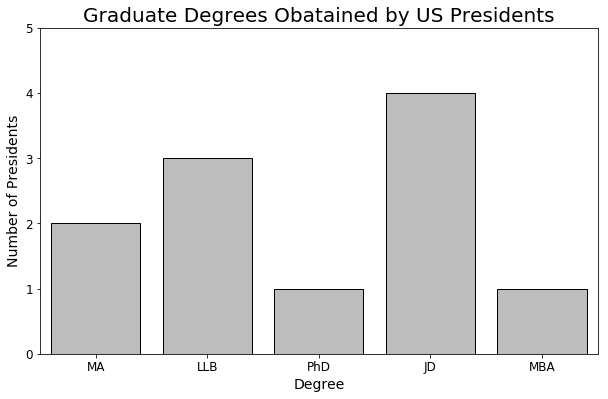

In [39]:
# With all the data ready and cleaned, lets take a look at what advance degrees presidents hold.
plt.figure(figsize=(10,6))

palette = ['#ca0020','#f4a582','#f7f7f7','#92c5de','#0571b0']
sns.countplot(x='Graduate_degree', data=data, color='#bdbdbd', edgecolor='k')

plt.title('Graduate Degrees Obatained by US Presidents', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)
plt.ylim(ymin=0, ymax=5)

First I should mentioned that only about a quarter of US Preidents hold an advance degree. Thus it'll be hard to extrapolate these results to all Presidents. 

We should also note that out of the 11 Presidents with advance degrees, 7 obtained a law-related degree. This kind of makes sense since to run a country it would be nice to know law.

Lets take a look at a plot for years as President for each Advance degree.

In [4]:
# Since all presidents w/o an Advance degree are reported as NaN.
# I can just drop them to have a df with only presidents with Advance degree. 
# Lets see if there are null values somewhere in the df.
data.isnull().sum()

Number                    0
Name_of_president         0
years_as_president        0
Party                     0
Profession                0
Undergrad_institution     0
Graduate_institution      0
Graduate_degree          34
dtype: int64

In [6]:
# No null values in other features. good.
advance_degree_df = data.dropna()
advance_degree_df

,Number,Name_of_president,years_as_president,Party,Profession,Undergrad_institution,Graduate_institution,Graduate_degree
1,2,John Adams,4.0,Federalist,Politician,Harvard University,Didn't attend Grad,MA
5,6,John Quincy Adams,4.0,National- Republican,Lawyer,Harvard University,Didn't attend Grad,MA
18,19,Rutherford B. Hayes,4.0,Republican,Lawyer,Kenyon College,Harvard Law School,LLB
24,25,William McKinley,4.0,Republican,Lawyer,Withdrew,Withdrew-Law,LLB
26,27,William Howard Taft,4.0,Republican,Lawyer,Yale University,University of Cincinnati College of Law,LLB
27,28,Woodrow Wilson,8.0,Democrat,Politicial Scientist,Princeton University,Johns Hopkins University,PhD
36,37,Richard M. Nixon,5.0,Republican,Lawyer,Whittier College,Duke University School of Law,JD
37,38,Gerald R. Ford,3.0,Republican,Lawyer,University of Michigan,Yale Law School,JD
41,42,William J. Clinton,8.0,Democrat,Lawyer,Georgetown University,Yale Law School,JD
42,43,George W. Bush,8.0,Republican,Businessman,Yale University,Harvard Business School,MBA


Text(0,0.5,'Number of Presidents')

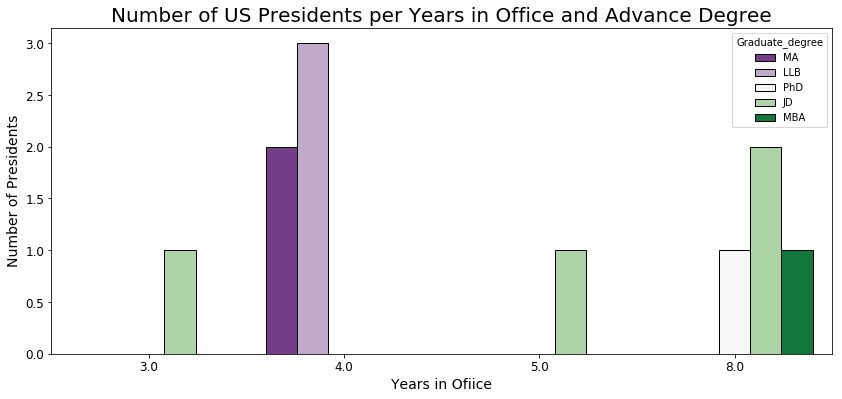

In [14]:
plt.figure(figsize=(14,6))

palette = ['#7b3294','#c2a5cf','#f7f7f7','#a6dba0','#008837']
sns.countplot(x='years_as_president', data=advance_degree_df, edgecolor='k', hue='Graduate_degree', palette=palette)

plt.title('Number of US Presidents per Years in Office and Advance Degree', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Years in Ofiice', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)

It is kind of hard to see a pattern here because of the sparse data, but it looks like for the most predominant degree (law: LLB and JD), Presidents are about as likely to spend 4 years or 8 years in office.

Text(0,0.5,'Number of Presidents')

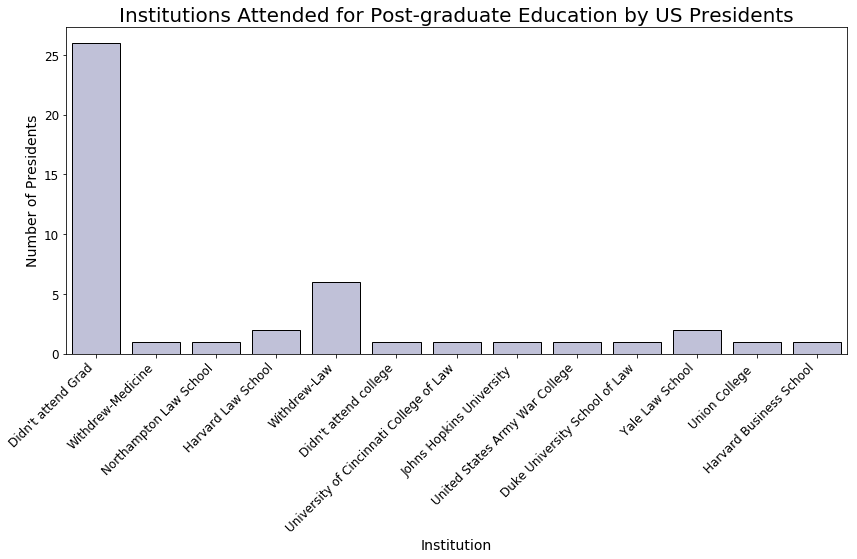

In [40]:
# On a related point, I wonder if Presidents go to the same Graduate School.
plt.figure(figsize=(14,6))

sns.countplot(x='Graduate_institution', data=data, edgecolor='k', color='#bcbddc')

plt.title('Institutions Attended for Post-graduate Education by US Presidents', fontsize=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.xlabel('Institution', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)

It turns out that Presidents go to a variety of Graduate schools, with Harvard and Yale Law schools being the most common ones.

I should also note tha about 7 Presidents went to Law school but withdrew before finishing.

This suggests in line with the observation made before that Presidents seem to be more interested in obtaining Law degrees.

Since I don't see a stricking pattern on specific school that Presidents attend more often for Graduate school. Lets see if there is any predominant Undergraduate institution.

(0, 10)

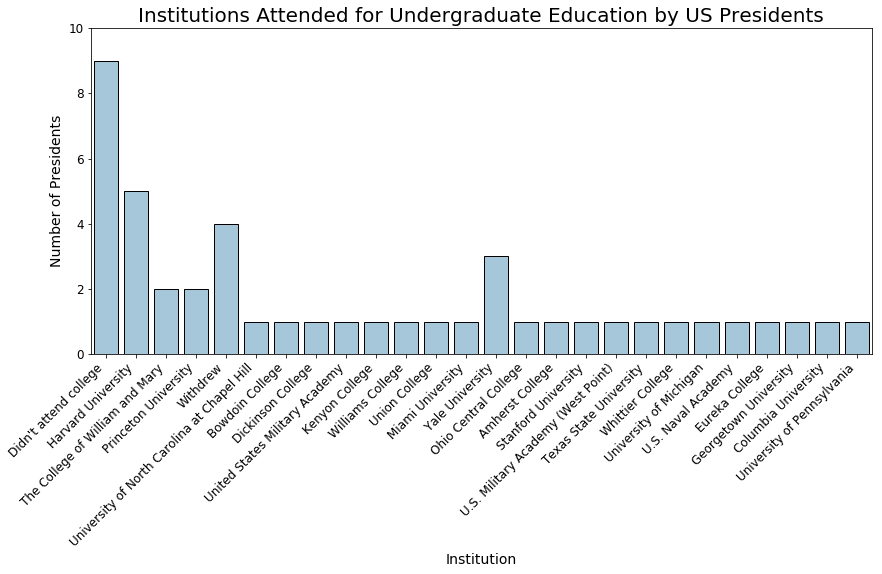

In [41]:
plt.figure(figsize=(14,6))

sns.countplot(x='Undergrad_institution', data=data, color='#9ecae1', edgecolor='k')

plt.title('Institutions Attended for Undergraduate Education by US Presidents', fontsize=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.xlabel('Institution', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)
plt.ylim(ymin=0, ymax=10)

Similar to Graduate school, presidents did undergraduate work at a variety of institutions with the most predominant being Harvard and Yale University (similar to Grad school).

Also to note is that 9 out of 45 Presidents or 20% did not attend college. Nonetheless, some of them actually were self-educated. For example, Abraham Lincoln didn't attend college but read the Law, passed the Bar exam and worked as a Lawyer.

Since Presidents attend a variety of school, without any school been super predominant and since several presidents didn't attend college, I think that Profession of the President may be the feature we should look into. Lets see if any profession is more predominant within Presidents. I wouldn't be surprised if Lawyer is the most predominant profession as previous data show that a large portion of Presidents went to Law school.

(0, 25)

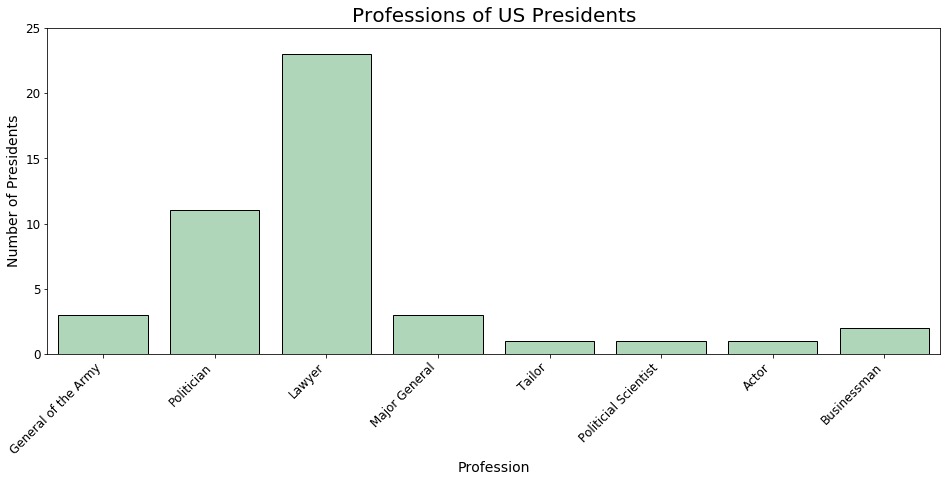

In [42]:
plt.figure(figsize=(16,6))

sns.countplot(x='Profession', data=data, color='#a8ddb5', edgecolor='k')

plt.title('Professions of US Presidents', fontsize=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.xlabel('Profession', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)
plt.ylim(ymin=0, ymax=25)

As expected the most predominant profession (53%) within Presidents is Lawyer. In the second place is another expected one: career politician.

Since there is a clear pattern in profession of presidents, I wonder if any of these 2 most predominants professions have any relationship to the time the presidents spent in office.

(0, 16)

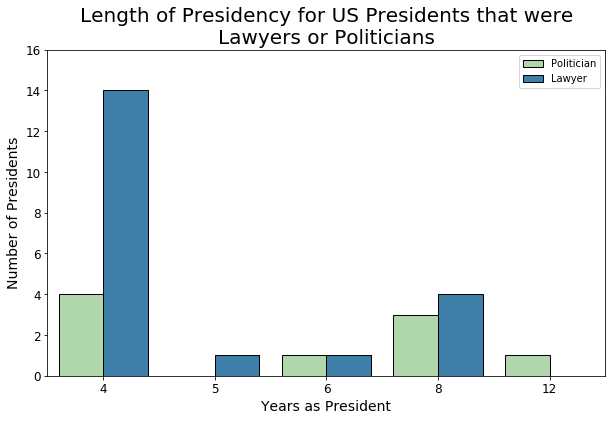

In [43]:
# filter the data to only keep presidents that were Lawyers of career politician.
law_pol = data[(data['Profession']=='Lawyer') | (data['Profession']=='Politician')] 
# re-filter the df and keep presidents that were in office for at eats 4 years.
# At this point I am only interested in presidents that at least finished one term.
law_pol = law_pol[law_pol['years_as_president']>=4]

plt.figure(figsize=(10,6))

palette = ['#abdda4','#2b83ba']
sns.countplot('years_as_president', data=law_pol, hue='Profession', palette=palette, edgecolor='k')

plt.title('Length of Presidency for US Presidents that were\nLawyers or Politicians', fontsize=20)
plt.xticks(np.arange(5), (4,5,6,8,12), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Years as President', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)
plt.legend(loc='upper right')
plt.ylim(ymin=0, ymax=16)

Turns out that there are about 3 times more lawyer Presidents expending 4 years in office than 8 years. Whereas for career politician Presidents there are about the same number of presidents expending 4 or 8 years in office. This suggests that presidents that were lawyers are more likely to be out of the office at the end of the first term than getting re-elected for a second term. This hints to the idea that Profession may have an effect in years in office for a president.

I should also point out that the only President the serve for more than 2 terms or 8 years was a career politician.

What about political party. Does it influence years in office? Lets first check how many Presidents per party are there.

(0, 20)

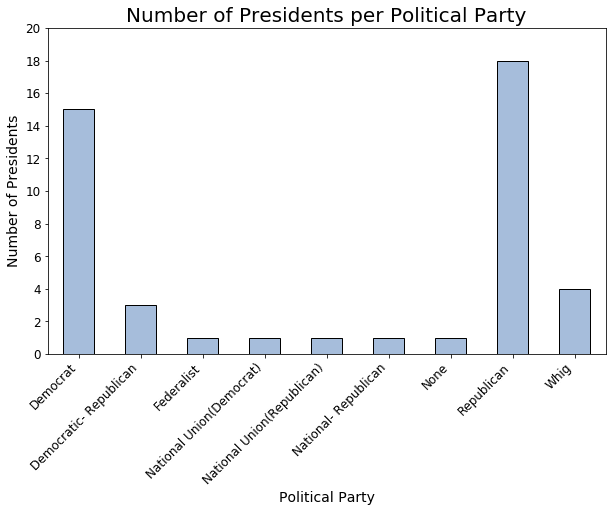

In [44]:
plt.figure(figsize=(10,6))

data.groupby(['Party'])['Number'].count().plot(kind='bar', edgecolor='k', color='#a6bddb')

plt.title('Number of Presidents per Political Party', fontsize=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(np.arange(0, 21, 2), fontsize=12)
plt.xlabel('Political Party', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)
plt.ylim(ymin=0, ymax=20)

We may have forgetten, but in the past there has been Presidents from several parties. Lets focused on the 2 main parties, Republlican and Democrat mostly becuase those are the only 2 current parties and also because there are about the same number or Republican and Democrat Presidents.

Lets look at years in office for Republican or Democrat presidents.

(0, 8)

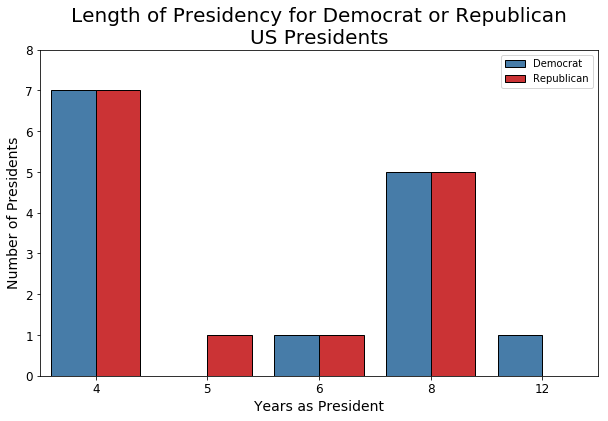

In [45]:
major_party_pres = data[(data['Party']=='Democrat') | (data['Party']=='Republican')]
major_party_pres = major_party_pres[major_party_pres['years_as_president']>=4]

plt.figure(figsize=(10,6))

palette = ['#377eb8', '#e41a1c']
sns.countplot('years_as_president', data=major_party_pres, hue='Party', palette=palette, edgecolor='k')

plt.title('Length of Presidency for Democrat or Republican\nUS Presidents', fontsize=20)
plt.xticks(np.arange(5), (4,5,6,8,12),fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Years as President', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)
plt.legend(loc='upper right')
plt.ylim(ymin=0, ymax=8)

This is interesting. There are the same number of Republican and Democrat Presidents that spent 4 years or 8 years in office.
Looks like political party doesn't infuence years in office.

There are another 2 things that I think may influence time in office: approval rating and funding. I tried to get data for raised funding for presidential campaigns but didn't find any. Approval rating started to be recorded in the 1933-1945 term. That was president 32nd. 

Lets get that data.

In [47]:
app_rating = pd.read_html('https://en.wikipedia.org/wiki/United_States_presidential_approval_rating')

# There is data for lowest, higher and average approval rating. I'll only keep Average approval rating.
app_rating = app_rating[1][[0,1,9]].drop([0], axis=0)
app_rating.columns = ['Number', 'President_name', 'AVG_Approval_rtg']
app_rating.sort_values(by='Number', ascending=True, inplace=True)
app_rating = app_rating.reset_index(drop=True)
app_rating

,Number,President_name,AVG_Approval_rtg
0,32[45],F. D. Roosevelt,63
1,33[44],Truman,45.4
2,34[43],Eisenhower,65.0
3,35[42],Kennedy,70.1
4,36[41],Johnson,55.1
5,37[40],Nixon,49.1
6,38[39],Ford,47.2
7,39[38],Carter,45.5
8,40[37],Reagan,52.8
9,41[36],G. H. W. Bush,60.9


In [48]:
app_rating.loc[[13], ['AVG_Approval_rtg']]=39. #correcting data for index 13
app_rating['AVG_Approval_rtg'].iloc[13]

39.0

In [49]:
app_rating['AVG_Approval_rtg'] = app_rating['AVG_Approval_rtg'].apply(pd.to_numeric) 
app_rating.dtypes

Number               object
President_name       object
AVG_Approval_rtg    float64
dtype: object

In [50]:
#slicing original data to get president 32nd until 45 and concatenate approval rating to it.
data_app_rtg = data[31:].reset_index(drop=True)
data_app_rtg = pd.concat([data_app_rtg, app_rating['AVG_Approval_rtg']], axis=1)
data_app_rtg

,Number,Name_of_president,years_as_president,Party,Profession,Undergrad_institution,Graduate_institution,Graduate_degree,AVG_Approval_rtg
0,32,Franklin D. Roosevelt,12.00,Democrat,Politician,Harvard University,Withdrew-Law,NaN,63.0
1,33,Harry S. Truman,8.00,Democrat,Politician,Withdrew,Withdrew-Law,NaN,45.4
2,34,Dwight D. Eisenhower,8.00,Republican,General of the Army,U.S. Military Academy (West Point),United States Army War College,NaN,65.0
3,35,John F. Kennedy,2.00,Democrat,Politician,Harvard University,Didn't attend Grad,NaN,70.1
4,36,Lyndon B. Johnson,6.00,Democrat,Politician,Texas State University,Withdrew-Law,NaN,55.1
5,37,Richard M. Nixon,5.00,Republican,Lawyer,Whittier College,Duke University School of Law,JD,49.1
6,38,Gerald R. Ford,3.00,Republican,Lawyer,University of Michigan,Yale Law School,JD,47.2
7,39,James Earl Carter,4.00,Democrat,Politician,U.S. Naval Academy,Union College,NaN,45.5
8,40,Ronald Reagan,8.00,Republican,Actor,Eureka College,Didn't attend Grad,NaN,52.8
9,41,George H.W. Bush,4.00,Republican,Politician,Yale University,Didn't attend Grad,NaN,60.9


In [51]:
# The average approval rating ranges from 39 to ~70. To find patterns it would be nice to bin the data.
# I'll bin it in 3 buckets.
data_app_rtg['Approval_binned'] = pd.cut(data_app_rtg['AVG_Approval_rtg'], bins=3)
data_app_rtg

,Number,Name_of_president,years_as_president,Party,Profession,Undergrad_institution,Graduate_institution,Graduate_degree,AVG_Approval_rtg,Approval_binned
0,32,Franklin D. Roosevelt,12.00,Democrat,Politician,Harvard University,Withdrew-Law,NaN,63.0,"(59.733, 70.1]"
1,33,Harry S. Truman,8.00,Democrat,Politician,Withdrew,Withdrew-Law,NaN,45.4,"(38.969, 49.367]"
2,34,Dwight D. Eisenhower,8.00,Republican,General of the Army,U.S. Military Academy (West Point),United States Army War College,NaN,65.0,"(59.733, 70.1]"
3,35,John F. Kennedy,2.00,Democrat,Politician,Harvard University,Didn't attend Grad,NaN,70.1,"(59.733, 70.1]"
4,36,Lyndon B. Johnson,6.00,Democrat,Politician,Texas State University,Withdrew-Law,NaN,55.1,"(49.367, 59.733]"
5,37,Richard M. Nixon,5.00,Republican,Lawyer,Whittier College,Duke University School of Law,JD,49.1,"(38.969, 49.367]"
6,38,Gerald R. Ford,3.00,Republican,Lawyer,University of Michigan,Yale Law School,JD,47.2,"(38.969, 49.367]"
7,39,James Earl Carter,4.00,Democrat,Politician,U.S. Naval Academy,Union College,NaN,45.5,"(38.969, 49.367]"
8,40,Ronald Reagan,8.00,Republican,Actor,Eureka College,Didn't attend Grad,NaN,52.8,"(49.367, 59.733]"
9,41,George H.W. Bush,4.00,Republican,Politician,Yale University,Didn't attend Grad,NaN,60.9,"(59.733, 70.1]"


([<matplotlib.axis.YTick at 0x206d7b3f6d8>,
 <a list of 4 Text yticklabel objects>)

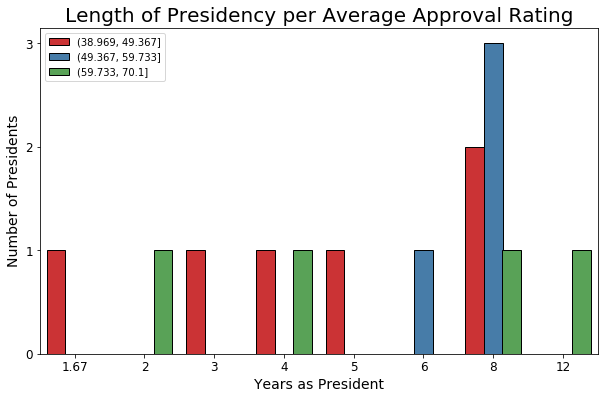

In [52]:
plt.figure(figsize=(10,6))

palette = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
sns.countplot('years_as_president', data=data_app_rtg, hue='Approval_binned', palette=palette, edgecolor='k')

plt.legend(loc='upper left')
plt.title('Length of Presidency per Average Approval Rating', fontsize=20)
plt.xlabel('Years as President', fontsize=14)
plt.ylabel('Number of Presidents', fontsize=14)
plt.xticks(np.arange(8), (1.67,2,3,4,5,6,8,12), fontsize=12)
plt.yticks(np.arange(0,4,1), fontsize=12)

Now this is interesting. It looks like regardless of the approval rating Presidents spend 1 or 2 terms in office. In fact even a presidents in the higher approval rating bin was murdered in office and only spend 2 years as president. This suggest that Approval rating doesn't influence time in office or re-election chances.

I think, campaign funding should have a good influcence. Sad I couldn't find the data.